In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df=pd.read_csv("/content/data.csv")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,3,4,5,6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Unnamed: 7,TEST
0,1/1/2017 0:00,867.63,910.42,-189.54,-186.04,852.13,-145.9,NaN,True
1,1/1/2017 0:05,879.23,918.14,-184.33,-182.1,862.53,-149.76,NaN,True
2,1/1/2017 0:10,875.67,924.18,-181.26,-166.47,866.06,-145.01,NaN,True
3,1/1/2017 0:15,875.28,923.15,-179.15,-174.83,865.85,-142.82,NaN,True
4,1/1/2017 0:20,891.66,934.26,-178.32,-173.72,876.06,-143.39,NaN,True
...,...,...,...,...,...,...,...,...,...
377714,8/7/2020 11:55,899.42,919.79,-224.07,-209.77,901.01,-175.15,NaN,NaN
377715,8/7/2020 12:00,879.9,895.02,-228.04,-211.28,878.08,-176.94,NaN,NaN
377716,8/7/2020 12:05,887.2,895.7,-230.11,-214.65,885.32,-179.18,NaN,NaN
377717,8/7/2020 12:10,908.5,916.33,-231.51,-218.09,906.2,-181.96,NaN,NaN


In [ ]:
df.columns

Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft', 'Unnamed: 7', 'TEST'],
      dtype='object')

In [ ]:
df.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Unnamed: 7,TEST
0,1/1/2017 0:00,867.63,910.42,-189.54,-186.04,852.13,-145.9,NaN,True
1,1/1/2017 0:05,879.23,918.14,-184.33,-182.1,862.53,-149.76,NaN,True
2,1/1/2017 0:10,875.67,924.18,-181.26,-166.47,866.06,-145.01,NaN,True
3,1/1/2017 0:15,875.28,923.15,-179.15,-174.83,865.85,-142.82,NaN,True
4,1/1/2017 0:20,891.66,934.26,-178.32,-173.72,876.06,-143.39,NaN,True


In [ ]:
df.shape

(377719, 9)

In [ ]:
df.corr()

,Unnamed: 7
Unnamed: 7,NaN


In [ ]:
df.isnull().sum()

time                             0
Cyclone_Inlet_Gas_Temp           0
Cyclone_Material_Temp            0
Cyclone_Outlet_Gas_draft         0
Cyclone_cone_draft               0
Cyclone_Gas_Outlet_Temp          0
Cyclone_Inlet_Draft              0
Unnamed: 7                  377719
TEST                        351303
dtype: int64

In [ ]:
df.describe

<bound method NDFrame.describe of                   time Cyclone_Inlet_Gas_Temp Cyclone_Material_Temp  \
0        1/1/2017 0:00                 867.63                910.42   
1        1/1/2017 0:05                 879.23                918.14   
2        1/1/2017 0:10                 875.67                924.18   
3        1/1/2017 0:15                 875.28                923.15   
4        1/1/2017 0:20                 891.66                934.26   
...                ...                    ...                   ...   
377714  8/7/2020 11:55                 899.42                919.79   
377715  8/7/2020 12:00                  879.9                895.02   
377716  8/7/2020 12:05                  887.2                 895.7   
377717  8/7/2020 12:10                  908.5                916.33   
377718  8/7/2020 12:15                 880.86                905.31   

       Cyclone_Outlet_Gas_draft Cyclone_cone_draft Cyclone_Gas_Outlet_Temp  \
0                       -189.54    

In [ ]:
df['Cyclone_Inlet_Gas_Temp'][2470:2472]

2470          921.7
2471    I/O Timeout
Name: Cyclone_Inlet_Gas_Temp, dtype: object

In [ ]:
df['Cyclone_Inlet_Gas_Temp'].unique()

array(['867.63', '879.23', '875.67', ..., 879.47, 879.68, 871.15],
      dtype=object)

In [ ]:
df.loc[df['Cyclone_Material_Temp'] == "I/O Timeout"]
#df.loc[df['Cyclone_Inlet_Gas_Temp']=="Unit Down"]

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Unnamed: 7,TEST
2471,1/9/2017 13:55,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,NaN,False
2472,1/9/2017 14:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,NaN,False
2473,1/9/2017 14:05,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,NaN,False
2474,1/9/2017 14:10,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,NaN,False
2475,1/9/2017 14:15,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,NaN,False
...,...,...,...,...,...,...,...,...,...
322814,1/29/2020 20:55,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,NaN,NaN
322815,1/29/2020 21:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,NaN,NaN
322816,1/29/2020 21:05,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,NaN,NaN
322817,1/29/2020 21:10,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,NaN,NaN


In [ ]:
df.loc[df['Cyclone_Material_Temp'] == "I/O Timeout"].replace('I/O Timeout','1',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
#df.loc[df['Cyclone_Material_Temp'] == "Unit Down"]

df.loc[df['Cyclone_Inlet_Gas_Temp'] == "I/O Timeout"]

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Unnamed: 7,TEST
2471,1/9/2017 13:55,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,NaN,False
2472,1/9/2017 14:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,NaN,False
2473,1/9/2017 14:05,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,NaN,False
2474,1/9/2017 14:10,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,NaN,False
2475,1/9/2017 14:15,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,NaN,False
...,...,...,...,...,...,...,...,...,...
322814,1/29/2020 20:55,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,NaN,NaN
322815,1/29/2020 21:00,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,NaN,NaN
322816,1/29/2020 21:05,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,NaN,NaN
322817,1/29/2020 21:10,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,I/O Timeout,NaN,NaN


In [ ]:
#Cyclone_Inlet_Gas_Temp
#df.loc[df['Cyclone_Material_Temp'] == "Unit Down"].replace('Unit Down','',inplace=True)
df["Cyclone_Material_Temp"].replace({"Unit Down": "9999", "I/O Timeout": "9999","Not Connect":"9999","Scan Timeout":"9999",
                                     "Configure":"9999","Comm Fail":"9999"}, inplace=True)

In [ ]:
#pd.to_numeric(df['Cyclone_Inlet_Gas_Temp'],I/O Timeout='float')
pd.to_numeric(df["Cyclone_Material_Temp"], downcast='float')

0         910.419983
1         918.140015
2         924.179993
3         923.150024
4         934.260010
             ...    
377714    919.789978
377715    895.020020
377716    895.700012
377717    916.330017
377718    905.309998
Name: Cyclone_Material_Temp, Length: 377719, dtype: float32

In [ ]:
#Cyclone_Material_Temp 

df["Cyclone_Inlet_Gas_Temp"].replace({"Unit Down": "9999", "I/O Timeout": "9999","Not Connect":"9999","Scan Timeout":"9999",
                                     "Configure":"9999","Comm Fail":"9999"}, inplace=True)

In [ ]:
pd.to_numeric(df["Cyclone_Inlet_Gas_Temp"], downcast='float')

0         867.630005
1         879.229980
2         875.669983
3         875.280029
4         891.659973
             ...    
377714    899.419983
377715    879.900024
377716    887.200012
377717    908.500000
377718    880.859985
Name: Cyclone_Inlet_Gas_Temp, Length: 377719, dtype: float32

In [ ]:
#Cyclone_Outlet_Gas_draft 
df["Cyclone_Outlet_Gas_draft"].replace({"Unit Down": "9999", "I/O Timeout": "9999","Not Connect":"9999","Scan Timeout":"9999",
                                     "Configure":"9999","Comm Fail":"9999"}, inplace=True)

In [ ]:
pd.to_numeric(df["Cyclone_Outlet_Gas_draft"], downcast='float')

0        -189.539993
1        -184.330002
2        -181.259995
3        -179.149994
4        -178.320007
             ...    
377714   -224.070007
377715   -228.039993
377716   -230.110001
377717   -231.509995
377718   -235.020004
Name: Cyclone_Outlet_Gas_draft, Length: 377719, dtype: float32

In [ ]:
#Cyclone_cone_draft 
df["Cyclone_cone_draft"].replace({"Unit Down": "9999", "I/O Timeout": "9999","Not Connect":"9999","Scan Timeout":"9999",
                                     "Configure":"9999","Comm Fail":"9999"}, inplace=True)

In [ ]:
pd.to_numeric(df["Cyclone_cone_draft"], downcast='float')

0        -186.039993
1        -182.100006
2        -166.470001
3        -174.830002
4        -173.720001
             ...    
377714   -209.770004
377715   -211.279999
377716   -214.649994
377717   -218.089996
377718   -219.440002
Name: Cyclone_cone_draft, Length: 377719, dtype: float32

In [ ]:
#Cyclone_Gas_Outlet_Temp 
df["Cyclone_Gas_Outlet_Temp"].replace({"Unit Down": "9999", "I/O Timeout": "9999","Not Connect":"9999","Scan Timeout":"9999",
                                     "Configure":"9999","Comm Fail":"9999"}, inplace=True)

In [ ]:
pd.to_numeric(df["Cyclone_Gas_Outlet_Temp"], downcast='float')

0         852.130005
1         862.530029
2         866.059998
3         865.849976
4         876.059998
             ...    
377714    901.010010
377715    878.080017
377716    885.320007
377717    906.200012
377718    882.099976
Name: Cyclone_Gas_Outlet_Temp, Length: 377719, dtype: float32

In [ ]:
#Cyclone_Inlet_Draft
df["Cyclone_Inlet_Draft"].replace({"Unit Down": "9999", "I/O Timeout": "9999","Not Connect":"9999","Scan Timeout":"9999",
                                     "Configure":"9999","Comm Fail":"9999"}, inplace=True)

In [ ]:
pd.to_numeric(df["Cyclone_Inlet_Draft"], downcast='float')

0        -145.899994
1        -149.759995
2        -145.009995
3        -142.820007
4        -143.389999
             ...    
377714   -175.149994
377715   -176.940002
377716   -179.179993
377717   -181.960007
377718   -184.020004
Name: Cyclone_Inlet_Draft, Length: 377719, dtype: float32

In [ ]:
df.columns

Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft', 'Unnamed: 7', 'TEST'],
      dtype='object')

In [ ]:
df1=df[df['time']=='Cyclone_Inlet_Gas_Temp']
df2=df[df['time']=='Cyclone_Material_Temp']
df3=df[df['time']=='Cyclone_Outlet_Gas_draft']
df4=df[df['time']=='Cyclone_cone_draft']
df5=df[df['time']=='Cyclone_Gas_Outlet_Temp']
df6=df[df['time']=='Cyclone_Inlet_Draft']



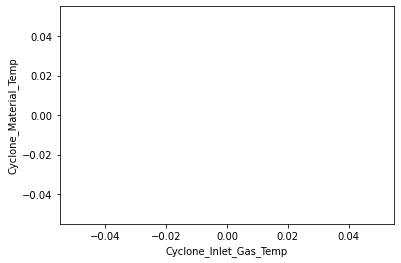

In [ ]:
plt.scatter(df1['Cyclone_Inlet_Gas_Temp'],df1['Cyclone_Material_Temp'],color='blue',marker='*')
plt.scatter(df2['Cyclone_Inlet_Gas_Temp'],df2['Cyclone_Material_Temp'],color='red',marker='.')
plt.xlabel('Cyclone_Inlet_Gas_Temp')
plt.ylabel('Cyclone_Material_Temp')
plt.show()

In [ ]:
df.head(3)

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Unnamed: 7,TEST
0,1/1/2017 0:00,867.63,910.42,-189.54,-186.04,852.13,-145.9,NaN,True
1,1/1/2017 0:05,879.23,918.14,-184.33,-182.1,862.53,-149.76,NaN,True
2,1/1/2017 0:10,875.67,924.18,-181.26,-166.47,866.06,-145.01,NaN,True


In [ ]:
df['TEST'].unique()

array([True, False, nan], dtype=object)

In [ ]:
df['TEST'].value_counts()

True     26350
False       66
Name: TEST, dtype: int64

In [ ]:
df_bkup=df.copy()

In [ ]:
df=df[['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']]

In [ ]:
df.head(3)

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,875.67,924.18,-181.26,-166.47,866.06,-145.01


In [ ]:
X = df.values

In [ ]:
pca = PCA(n_components=1,svd_solver= 'full')

In [ ]:
len(df)

377719

In [ ]:
principalComponents = pca.fit_transform(X)

In [ ]:
principalComponents

array([[ 84.59548159],
       [ 99.23362826],
       [111.02677613],
       ...,
       [ 60.2007074 ],
       [ 83.85110157],
       [ 54.66892891]])

In [ ]:
pca.explained_variance_ratio_

array([0.86808765])

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])#, 'principal component 2'])

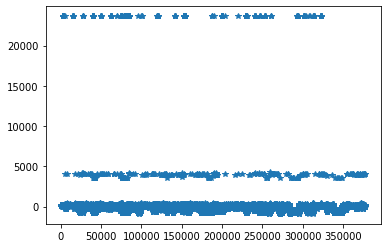

In [ ]:
plt.plot(principalDf["principal component 1"], "*")